In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df1=pd.read_csv('/Users/apple/Desktop/Data science/py-master/ML/9_decision_tree/salaries.csv')
df1.head(10)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df1['c_n']=le.fit_transform(df['company'])
df1['j_n']=le.fit_transform(df['job'])
df1['d_n']=le.fit_transform(df['degree'])

In [28]:
df1.head(10)

,company,job,degree,salary_more_then_100k,c_n,j_n,d_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [29]:
x=df1.drop(['company','job','salary_more_then_100k','degree'],axis='columns')

In [30]:
y=df['salary_more_then_100k']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [54]:
from sklearn import tree


In [55]:
model=tree.DecisionTreeClassifier()

In [56]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
model.score(x_test,y_test)

0.7142857142857143

In [58]:
model.predict([[2,1,0]])

array([0])

In [59]:
y_pre=model.predict(x_test)

In [60]:
y_pre

array([1, 0, 1, 1, 1, 0, 1])

In [61]:
y_test

3     1
0     0
13    1
15    1
1     0
2     1
12    1
Name: salary_more_then_100k, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cnf=confusion_matrix(y_pre,y_test)

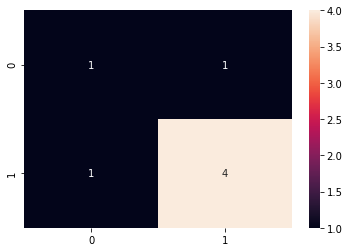

In [64]:
sns.heatmap(cnf,annot=True)